# Logistic Regression: Tumor Data and Student Data
Import all necessary libraries. (Note: Logistic Regression in sklearn is L2-regularized by default)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Tumor Data Set

accuracy = 1.0
Coefficients:  [-64.23387103] [[13.98233094]]


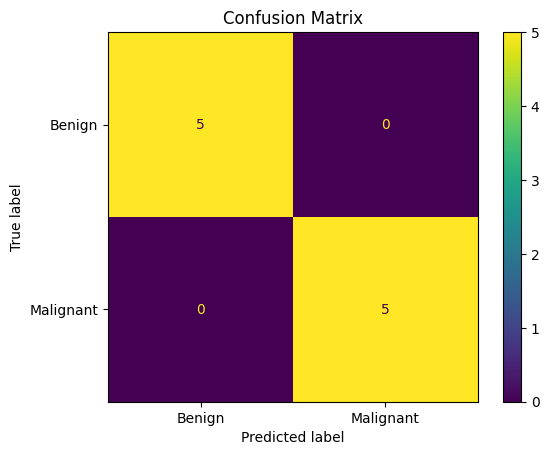

In [2]:
x = np.array([1.2,3.1,4,3.8,2.5,7,5.2,5.5,6.1,7.5]).reshape(-1,1); 
y = np.array([0,0,0,0,0,1,1,1,1,1]);

model = LogisticRegression(solver='newton-cg', random_state=0,penalty=None).fit(x, y)
ypred = model.predict(x)
print(f"accuracy = {model.score(x, y)}")
print(f"Coefficients: ", model.intercept_, model.coef_)
cfm = confusion_matrix(y, ypred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["Benign", "Malignant"])
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

Plot the logistic curve (by plotting probability estimates or scores).

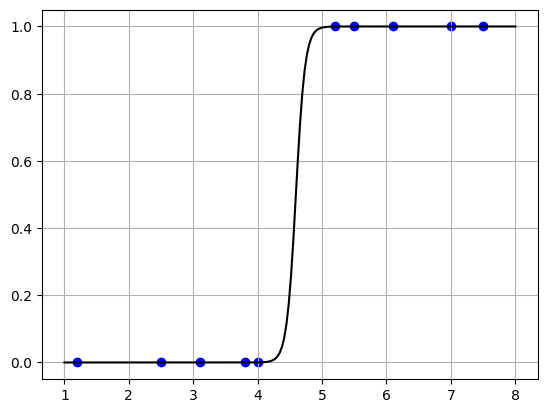

In [3]:
plt.scatter(x,y,color='b')
x2 = np.linspace(1,8,200).reshape(-1,1)
y2 = model.predict_proba(x2)
plt.plot(x2,y2[:,1],color='k')
plt.grid()
plt.show()

## Student Data Set

accuracy = 0.7
Coefficients:  [-6.27439911] [[2.43667417]]


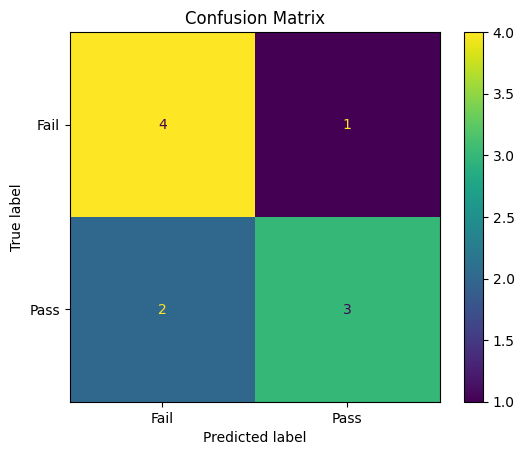

In [4]:
x = np.array([4.2,2.2,3.5,2.5,5.1,1.3,3.0,1.8,2.4,1.5]).reshape(-1,1); 
y = np.array([1,0,1,1,1,0,0,0,1,0]);

model = LogisticRegression(solver='newton-cg', random_state=0,penalty=None).fit(x, y)
print(f"accuracy = {model.score(x, y)}")
print(f"Coefficients: ", model.intercept_, model.coef_)
cfm = confusion_matrix(y, model.predict(x))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["Fail", "Pass"])
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

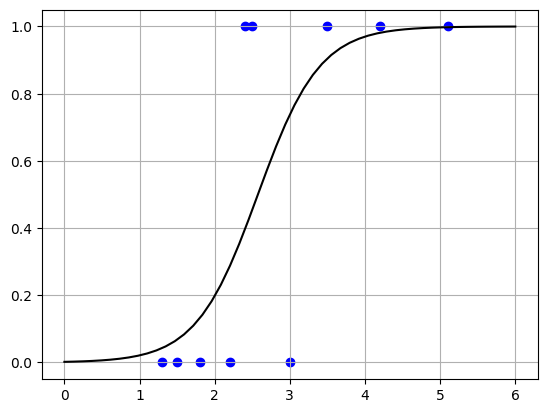

In [5]:
plt.scatter(x,y,color='b')
x2 = np.linspace(0,6).reshape(-1,1)
y2 = model.predict_proba(x2)
plt.plot(x2,y2[:,1],color='k')
plt.grid()
plt.show()

Generate the ROC curve for the Student Data Set.

AUC:  0.92


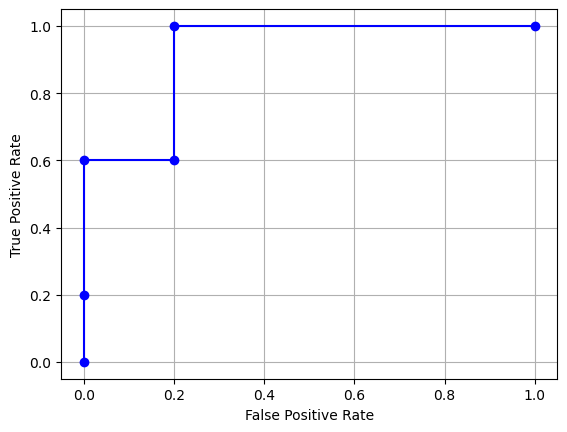

In [6]:
from sklearn import metrics

y2 = model.predict_proba(x)
fpr, tpr, thresholds = metrics.roc_curve(y, y2[:,1])
print(f"AUC: ",metrics.roc_auc_score(y, y2[:,1]))
plt.plot(fpr,tpr,'b-o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()